In [20]:
import torchio as tio
transforms = [
    tio.ToCanonical(),  # to RAS
    tio.Resample((1, 1, 1)),  # to 1 mm iso
    tio.Resize((512,512,512))
]
ixi_dataset = tio.datasets.IXI(
    './dataset/IXI/',
    modalities=('T1', 'T2'),
    transform=tio.Compose(transforms),
    download=False,
)



In [21]:
print('Number of subjects in dataset:', len(ixi_dataset))  # 577
sample_subject = ixi_dataset[0]
print(len(sample_subject))
print(sample_subject)

print('Keys in subject:', tuple(sample_subject.keys()))  # ('T1', 'T2')
print('Shape of T1 data:', sample_subject['T1'].shape)  # [1, 180, 268, 268]
print('type of T1 data:', type(sample_subject['T1']))
print('Shape of T2 data:', sample_subject['T2'].shape)
print('type of T2 data:', type(sample_subject['T2'])) # (1, 240, 241, 163)

print(sample_subject['subject_id'])

# print(type(sample_subject['T1'].tensor()))

Number of subjects in dataset: 577
2
Subject(Keys: ('subject_id', 'T1', 'T2'); images: 2)
Keys in subject: ('subject_id', 'T1', 'T2')
Shape of T1 data: (1, 180, 240, 240)
type of T1 data: <class 'torchio.data.image.ScalarImage'>
Shape of T2 data: (1, 240, 241, 163)
type of T2 data: <class 'torchio.data.image.ScalarImage'>
IXI002-Guys-0828


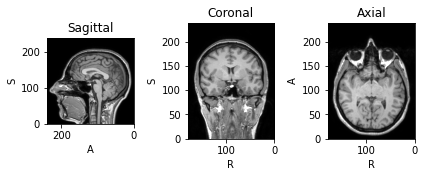

torch.Size([1, 180, 240, 240])



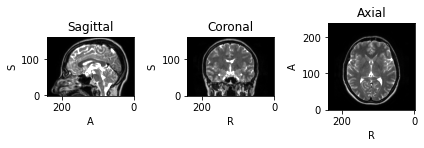

torch.Size([1, 240, 241, 163])


In [23]:
import matplotlib.pyplot as plt

sample_subject['T1'].plot()
print(sample_subject['T1'].tensor.shape)
print()

sample_subject['T2'].plot()
print(sample_subject['T2'].tensor.shape)

In [30]:
print('jae jung'.split())

['jae', 'jung']


In [4]:
import torch
import torchio as tio

x = torch.randn((1,241, 241, 165))
transforms = tio.Compose([
    tio.ToCanonical(),  # to RAS
    tio.Resample((1, 1, 1)),  # to 1 mm iso
    tio.Resize((200,200,200)),
])

print(transforms(x).shape)
# print(tio.Resize((500,500,500))(x).shape)


torch.Size([1, 200, 200, 200])


===============================================================================================================================================

ImageSeriesReader (0x55610e31ee40): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



torch.Size([1, 204, 256, 256])


ImageSeriesReader (0x55610e31ee40): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



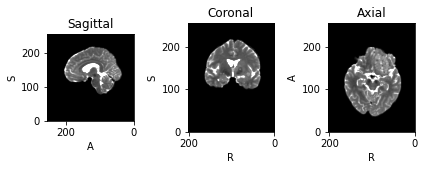

In [3]:
import torchio as tio
from subprocess import call
root_dir = '/home/ljj0512/private/project/dataset/RSNAMICCAI'
transforms = tio.Compose([
    # tio.Resize((300,300,300)),
    tio.ToCanonical(),  # to RAS
    tio.Resample((1, 1, 1)),  # to 1 mm iso
])
train_set = tio.datasets.RSNAMICCAI(root_dir, train=True, transform=transforms)
test_set = tio.datasets.RSNAMICCAI(root_dir, train=False, transform=transforms)
print(train_set[0].T2w.data.shape)
train_set[0].T2w.plot()

ImageSeriesReader (0x55610e31ee40): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



torch.Size([1, 408, 512, 512])


ImageSeriesReader (0x55610e31ee40): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



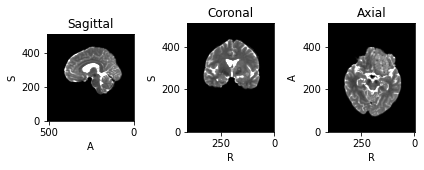

In [6]:
import torchio as tio
from subprocess import call
root_dir = '/home/ljj0512/private/project/dataset/RSNAMICCAI'
transforms = tio.Compose([
    # tio.Resize((300,300,300)),
    tio.ToCanonical(),  # to RAS
    tio.Resample((0.5, 0.5, 0.5)),  # to 1 mm iso
])
train_set = tio.datasets.RSNAMICCAI(root_dir, train=True, transform=transforms)
test_set = tio.datasets.RSNAMICCAI(root_dir, train=False, transform=transforms)
print(train_set[0].T2w.data.shape)
train_set[0].T2w.plot()

ImageSeriesReader (0x55610e31ee40): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



torch.Size([1, 408, 512, 512])


ImageSeriesReader (0x55610e31ee40): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



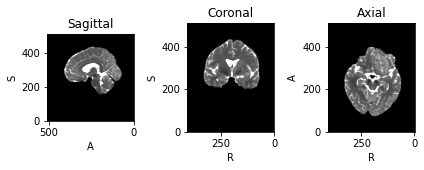

In [5]:
import torchio as tio
from subprocess import call
root_dir = '/home/ljj0512/private/project/dataset/RSNAMICCAI'
transforms = tio.Compose([
    # tio.Resize((300,300,300)),
    tio.ToCanonical(),  # to RAS
    # tio.Resample((1, 1, 1)),  # to 1 mm iso
])
train_set = tio.datasets.RSNAMICCAI(root_dir, train=True, transform=transforms)
test_set = tio.datasets.RSNAMICCAI(root_dir, train=False, transform=transforms)
print(train_set[0].T2w.data.shape)
train_set[0].T2w.plot()

In [9]:
print(len(train_set), len(test_set))
print(type(train_set))
print(type(train_set[0]))
print(train_set)

582 87
<class 'torchio.datasets.rsna_miccai.RSNAMICCAI'>


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



<class 'torchio.data.subject.Subject'>


In [11]:
import sys
import os
from contextlib import contextmanager

def flush(stream):
    try:
        libc.fflush(None)
        stream.flush()
    except (AttributeError, ValueError, IOError):
        pass  # unsupported


def fileno(file_or_fd):
    fd = getattr(file_or_fd, 'fileno', lambda: file_or_fd)()
    if not isinstance(fd, int):
        raise ValueError("Expected a file (`.fileno()`) or a file descriptor")
    return fd


@contextmanager
def stdout_redirected(to=os.devnull, stdout=None):
    if stdout is None:
       stdout = sys.stdout

    stdout_fd = fileno(stdout)
    # copy stdout_fd before it is overwritten
    # Note: `copied` is inheritable on Windows when duplicating a standard stream
    with os.fdopen(os.dup(stdout_fd), 'wb') as copied:
        # stdout.flush()  # flush library buffers that dup2 knows nothing about
        # stdout.flush() does not flush C stdio buffers on Python 3 where I/O is
        # implemented directly on read()/write() system calls. To flush all open C stdio
        # output streams, you could call libc.fflush(None) explicitly if some C extension uses stdio-based I/O:
        flush(stdout)
        try:
            os.dup2(fileno(to), stdout_fd)  # $ exec >&to
        except:
            print('fail!!')


import SimpleITK as sitk

with open('output.txt', 'w') as f, stdout_redirected(f, stdout=sys.stderr):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames()
    reader.SetFileNames(dicom_names)
    image = reader.Execute()

with open('output.txt') as f:
    content = f.read()
if "warning" in content.lower():
    raise RuntimeError('SimpleITK Warning!')

for i in range(len(train_set)):
    print(train_set[i].T2w.data.shape)
    if(i >= 20):
        break


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747



torch.Size([1, 204, 256, 256])
torch.Size([1, 192, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



torch.Size([1, 204, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000697556

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000754849



torch.Size([1, 212, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000899893



torch.Size([1, 204, 256, 257])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000545123

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000723496

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000102875

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000103474



torch.Size([1, 168, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.00078569

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.00100209

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.14411e-05



torch.Size([1, 202, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.00101728



torch.Size([1, 257, 257, 259])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.10867e-05

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000763409

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000662598



torch.Size([1, 256, 225, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.00100171

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.00100171

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.0003



torch.Size([1, 256, 256, 258])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000100306



torch.Size([1, 256, 259, 257])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000907459



torch.Size([1, 204, 256, 257])
torch.Size([1, 256, 259, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398049



torch.Size([1, 209, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000396639



torch.Size([1, 180, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000396639



torch.Size([1, 180, 256, 256])
torch.Size([1, 257, 258, 257])
torch.Size([1, 256, 257, 258])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000985184



torch.Size([1, 256, 259, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000841968

ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000199749



torch.Size([1, 204, 256, 256])


ImageSeriesReader (0x55d5ced5a780): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000839569



torch.Size([1, 204, 256, 256])


In [5]:
import warnings
warnings.filterwarnings("ignore")
print(test_set[0].T2w.data.shape)
print(test_set[1].T2w.data.shape)

ImageSeriesReader (0x562164320460): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000981787



torch.Size([1, 256, 256, 258])


ImageSeriesReader (0x562164320460): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000863878



torch.Size([1, 205, 256, 256])


00002
1


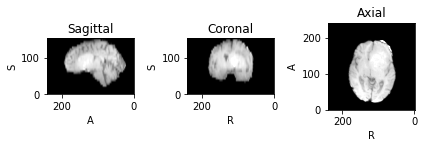

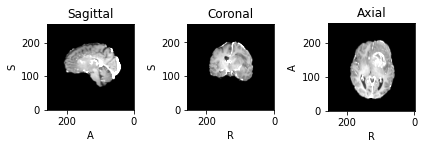

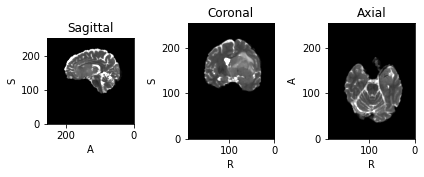

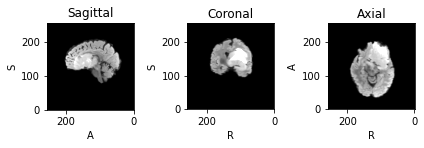

In [81]:

print(train_set[1].BraTS21ID)
print(train_set[1].MGMT_value)
train_set[1].T1w.plot()
train_set[1].T1w.data.shape
train_set[1].T1wCE.plot()
train_set[1].T2w.plot()
train_set[1].FLAIR.plot()


ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



00003


ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



0


ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



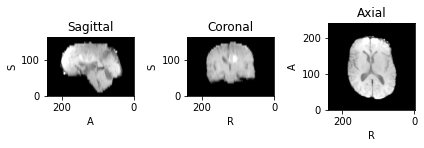

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



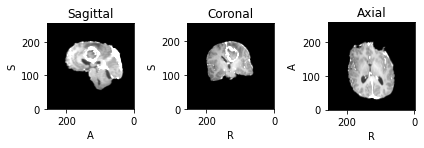

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



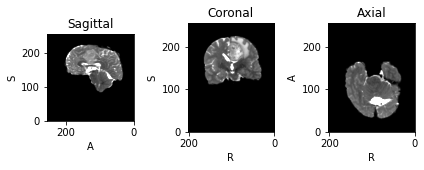

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467



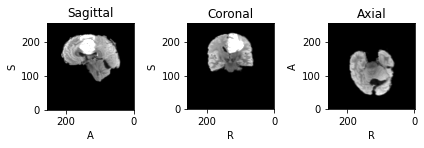

In [82]:

print(train_set[2].BraTS21ID)
print(train_set[2].MGMT_value)
train_set[2].T1w.plot()
train_set[2].T1wCE.plot()
train_set[2].T2w.plot()
train_set[2].FLAIR.plot()


In [83]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=4)

i = 0
for batch in train_loader:
    if i == 1:
        break
    print(len(batch))
    i += 1

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000398747

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000942467

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000697556

ImageSeriesReader (0x5583ce6eb2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000754849



RuntimeError: stack expects each tensor to be equal size, but got [1, 241, 241, 165] at entry 0 and [1, 241, 241, 156] at entry 1